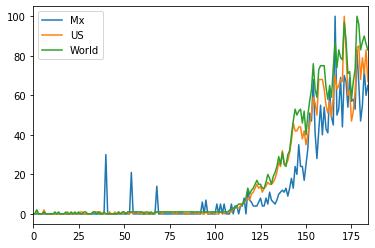

In [5]:
# -*- coding: utf-8 -*-

###############################################################################
# "CRISPR" example
###############################################################################
#  Objectives:
#   To learn how to filter and merge dataframes in pandas with Google Trends
#       data.
#  Source:
#   https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#   https://www.datacamp.com/community/tutorials/joining-dataframes-pandas
#   https://trends.google.com/trends/explore?geo=MX&q=crispr
###############################################################################

###############################################################################
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

###############################################################################
# Loading the US trends for CRISPR
data = pd.read_csv(
    "../data/extracted/Trends/CRISPR.csv",
    header=1
)
data.keys()
data.rename(
    columns={"Month": "month", 'crispr: (United States)': "US"},
    inplace=True
)
data["US"].unique()
# Cambia los <1 con 0
data.replace("<1", 0, inplace=True)
data["US"].unique()
data["US"] = data["US"].astype(int)
###############################################################################
# Loading the worldwide trends for CRISPR
dataW = pd.read_csv(
    "../data/extracted/Trends/CRISPRWorld.csv",
    header=1
)
dataW.keys()
dataW.rename(
    columns={"Month": "month", 'crispr: (Worldwide)': "World"},
    inplace=True
)
dataW.dtypes
dataW["World"].unique()
dataW.replace("<1", 0, inplace=True)
dataW["World"].unique()
dataW["World"] = dataW["World"].astype(int)

pd.concat([data, dataW], axis=1)
dataFull = pd.merge(data, dataW, how="inner", on="month")

###############################################################################
# Loading the Mexican trends for CRISPR with a reduced timespan
dataM = pd.read_csv(
    "../data/extracted/Trends/CRISPRMx.csv",
    header=1
)
dataM.keys()
dataM.rename(
    columns={"Month": "month", 'crispr: (Mexico)': "Mx"},
    inplace=True
)

dataFull = pd.merge(dataM, dataFull, how="inner", on="month")
dataFull.plot()
plt.savefig('./images/crispr.png', dpi=500)

